<a href="https://colab.research.google.com/github/claitonp/tech-challenge/blob/main/tech_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Challenge - Fase 1

## Análise e previsão de despesas médicas

O conjunto de dados de seguro médico abrange vários fatores que influenciam as despesas médicas, como idade, sexo, IMC, tabagismo, número de filhos e região. Este conjunto de dados serve de base para o treinamento de modelos de aprendizado de máquina capazes de prever despesas médicas para novos segurados.


# Itens abordados:

* 1 - Análise exploratória dos dados
* 2 - Regressao linear simples
* 3 - Modelo baseado em árvore (DecisionTreeRegressor)
  * 3.1 - Validação cruzada
  * 3.2 - Visualizando previsões
* 4 - Modelo baseado em árvore (RandomForestRegressor)
  * 4.1 - Validação cruzada
  * 4.2 - Visualizando previsões
  * 4.2 - Usando StandardScaler





# Atributos:

- **age**: idade

- **sex**: Sexo

- **bmi**: indice de massa corporal

- **children**: número de filhos

- **smoker**: fumante

- **region**: região

- **charges**: gasto com o plano de saúde

# 1 - Análise exploratória dos dados

In [37]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Necessário fazer o upload .csv

In [3]:
dados = pd.read_csv("medical_insurance.csv")

A planilha foi obtida do kaggle.com https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction?resource=download

In [4]:
dados.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dados.shape

(2772, 7)

In [6]:
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [52]:
duplicados = dados.duplicated()
numero_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {numero_duplicados}")
linhas_duplicadas = dados[duplicados]
print(linhas_duplicadas)

Número de registros duplicados: 1435
      age  sex     bmi  children  smoker  region      charges  bmi-types
581    19    1  30.590         0       0       1   1639.56310          3
1338   23    1  34.400         0       0       3   1826.84300          3
1339   56    0  39.820         0       0       2  11090.71780          4
1340   27    1  42.130         0       1       2  39611.75770          5
1341   19    1  24.600         1       0       3   1837.23700          1
...   ...  ...     ...       ...     ...     ...          ...        ...
2767   47    0  45.320         1       0       2   8569.86180          5
2768   21    0  34.600         0       0       3   2020.17700          3
2769   19    1  26.030         1       1       1  16450.89470          2
2770   23    1  18.715         0       0       1  21595.38229          1
2771   54    1  31.600         0       0       3   9850.43200          3

[1435 rows x 8 columns]


In [ ]:
# Removendo duplicados (por padrão, mantém a primeira linha)
dados_sem_duplicatas = dados.drop_duplicates()

In [7]:
dados.describe().T


,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


In [8]:
dados.groupby('sex').describe()

age                                                         bmi  \
         count       mean        std   min   25%   50%   75%   max   count   
sex                                                                          
female  1366.0  39.481698  14.093176  18.0  27.0  40.0  52.0  64.0  1366.0   
male    1406.0  38.748222  14.065654  18.0  26.0  39.0  51.0  64.0  1406.0   

                   ... children      charges                              \
             mean  ...      75%  max   count          mean           std   
sex                ...                                                     
female  30.434473  ...      2.0  5.0  1366.0  12486.831977  11049.445434   
male    30.960633  ...      2.0  5.0  1406.0  14013.872721  13094.571070   

                                                                      
              min          25%        50%           75%          max  
sex                                                                   
female  1607.5101  4804.400100  9283.5620  14418.154925  63770.42801  
male    1121.8739  4523.184438  9361.3268  19160.177000  62592.87309  

[2 rows x 32 columns]

In [11]:
dados.groupby('smoker').describe()

age                                                         bmi  \
         count       mean        std   min   25%   50%   75%   max   count   
smoker                                                                       
no      2208.0  39.275362  14.114949  18.0  26.0  39.0  52.0  64.0  2208.0   
yes      564.0  38.460993  13.943055  18.0  27.0  37.5  49.0  64.0   564.0   

                   ... children      charges                              \
             mean  ...      75%  max   count          mean           std   
smoker             ...                                                     
no      30.665765  ...      2.0  5.0  2208.0   8417.874411   6015.568209   
yes     30.840656  ...      2.0  5.0   564.0  32223.139764  11521.258969   

                                                                         
               min           25%         50%           75%          max  
smoker                                                                   
no       1121.8739   3953.906862   7341.4160  11354.085925  36910.60803  
yes     12829.4551  20984.093600  34725.8811  41097.161750  63770.42801  

[2 rows x 32 columns]

In [ ]:
dados.groupby('region').describe()

age                                                         bmi  \
           count       mean        std   min   25%   50%    75%   max  count   
region                                                                         
northeast  658.0  39.243161  14.005929  18.0  27.0  39.0  51.00  64.0  658.0   
northwest  664.0  39.081325  14.092862  19.0  26.0  39.0  51.25  64.0  664.0   
southeast  766.0  38.762402  14.273095  18.0  26.0  39.0  51.00  64.0  766.0   
southwest  684.0  39.397661  13.948653  19.0  27.0  39.0  51.00  64.0  684.0   

                      ... children      charges                              \
                mean  ...      75%  max   count          mean           std   
region                ...                                                     
northeast  29.157781  ...      2.0  5.0   658.0  13475.874737  11310.618603   
northwest  29.147259  ...      2.0  5.0   664.0  12463.129315  10996.174365   
southeast  33.478773  ...      2.0  5.0   766.0  14748.777706  14138.464968   
southwest  30.584503  ...      2.0  5.0   684.0  12164.196435  11419.830441   

                                                                           
                 min          25%          50%           75%          max  
region                                                                     
northeast  1694.7964  5209.578850  10072.05505  16776.304050  58571.07448  
northwest  1621.3402  4733.635288   9081.14720  15153.617225  60021.39897  
southeast  1121.8739  4349.725100   9140.95100  19534.924300  63770.42801  
southwest  1241.5650  4746.344000   8790.53100  13390.559000  52590.82939  

[4 rows x 32 columns]

In [ ]:
dados.groupby('children').describe()

age                                                          bmi  \
           count       mean        std   min    25%   50%   75%   max   count   
children                                                                        
0         1186.0  38.431703  16.433550  18.0  22.00  36.0  55.0  64.0  1186.0   
1          672.0  39.300595  12.128551  18.0  30.00  40.0  49.0  64.0   672.0   
2          496.0  39.286290  11.776826  18.0  29.75  40.0  48.0  64.0   496.0   
3          324.0  41.395062  12.238779  18.0  31.00  41.0  52.0  64.0   324.0   
4           52.0  38.769231  11.833179  18.0  29.00  38.0  48.0  61.0    52.0   
5           42.0  35.904762   9.672212  19.0  28.00  39.0  43.0  52.0    42.0   

                     ...                charges                              \
               mean  ...     75%    max   count          mean           std   
children             ...                                                      
0         30.628508  ...  34.865  53.13  1186.0  12317.920881  11983.528943   
1         30.705744  ...  34.385  52.58   672.0  12722.650521  11859.598348   
2         31.035806  ...  35.555  48.07   496.0  15268.182723  13163.847347   
3         30.580000  ...  34.320  46.53   324.0  15304.070620  12283.730097   
4         31.314615  ...  33.660  41.47    52.0  13550.983876   8994.512465   
5         28.915000  ...  31.900  46.75    42.0   8706.036629   3549.240196   

                                                                          
                min          25%          50%           75%          max  
children                                                                  
0         1121.8739  2727.395100   9850.43200  14394.557900  63770.42801  
1         1711.0268  4776.207225   8483.87015  15632.052050  58571.07448  
2         2304.0022  6169.665100   9264.97915  21138.760025  49577.66240  
3         3443.0640  6652.528800  10580.52000  19199.944000  60021.39897  
4         4504.6624  7243.813600  11024.41820  17128.426080  40182.24600  
5         4687.7970  5615.369000   8596.82780  10096.970000  19023.26000  

[6 rows x 24 columns]

<Axes: xlabel='age', ylabel='Count'>

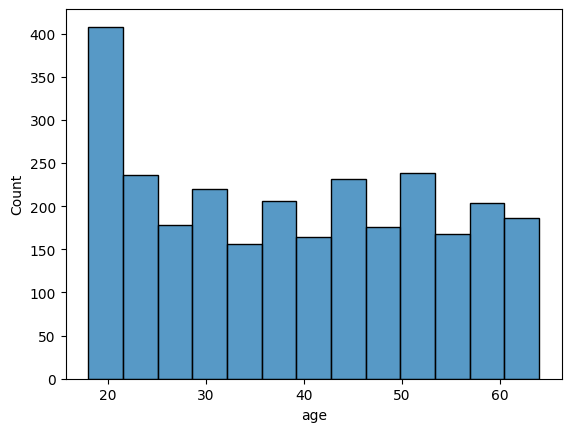

In [12]:
sb.histplot(data=dados, x="age")

<Axes: xlabel='children', ylabel='Count'>

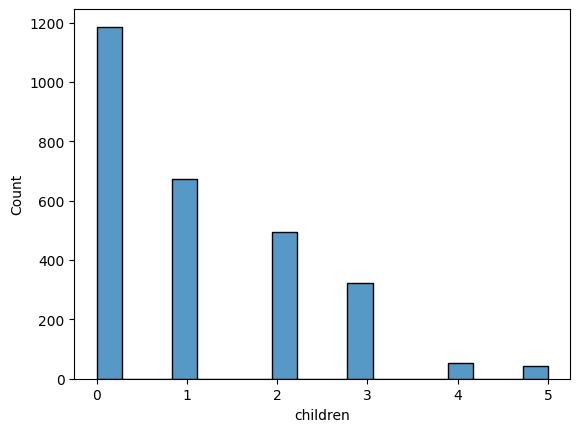

In [13]:
sb.histplot(data=dados, x="children")

<Axes: xlabel='bmi', ylabel='Count'>

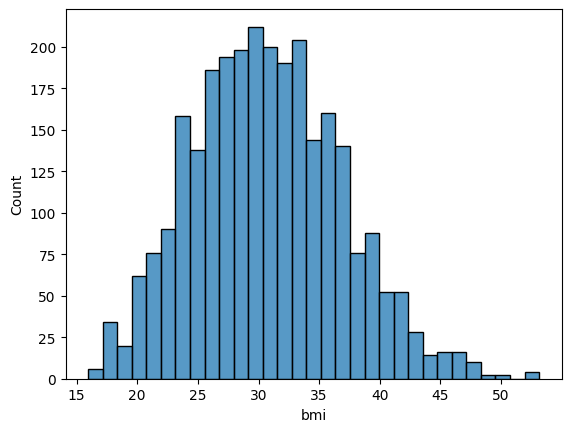

In [15]:
sb.histplot(data=dados, x="bmi")

<ipython-input-16-f53d60a028e2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='age', y='charges', data=dados, palette='hls')


<Axes: xlabel='age', ylabel='charges'>

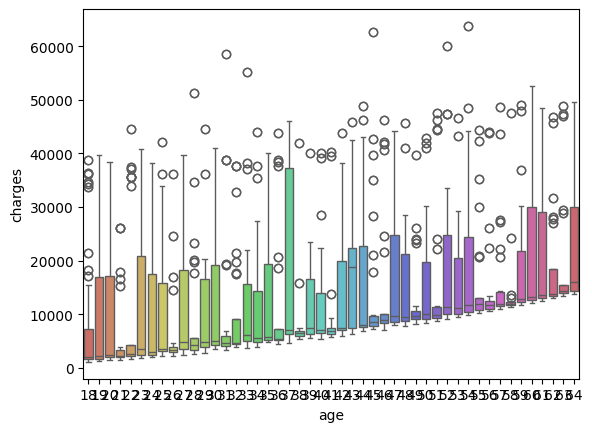

In [16]:
sb.boxplot(x='age', y='charges', data=dados, palette='hls')

**Obs:** Pode ser observado nesse gráfico, a relação da idade e dos gastos, que com o avanço da idade os gastos vão aumentando....

<Axes: xlabel='smoker', ylabel='charges'>

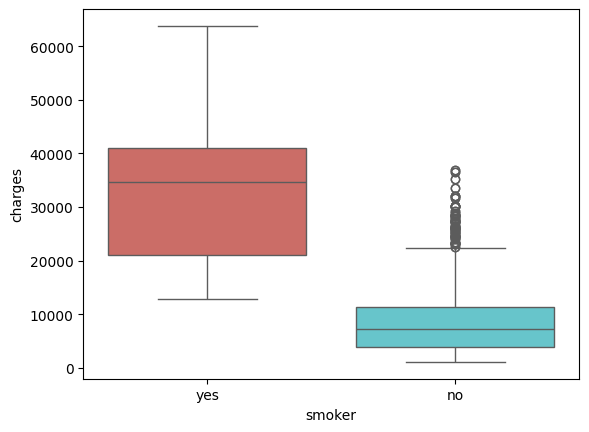

In [20]:

sb.boxplot(x='smoker', y='charges', hue='smoker', data=dados, palette='hls', legend=False)

**Obs:** Nesse gráfico pode ser observado que o fumante tem um gasto maior, em relação ao não fumante.

<Axes: xlabel='sex', ylabel='charges'>

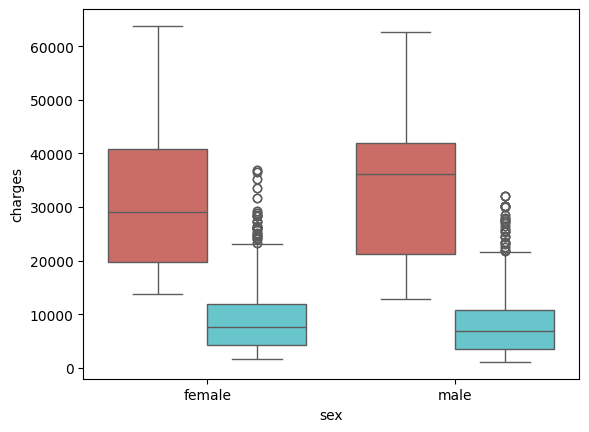

In [21]:

sb.boxplot(x='sex', y='charges', hue='smoker', data=dados, palette='hls', legend=False)

<Axes: xlabel='charges'>

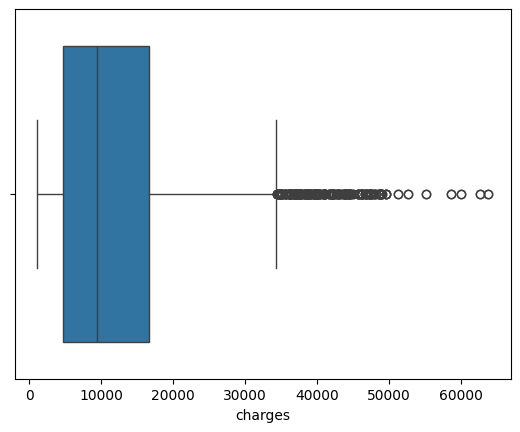

In [22]:
sb.boxplot(x=dados["charges"])

<Axes: xlabel='bmi'>

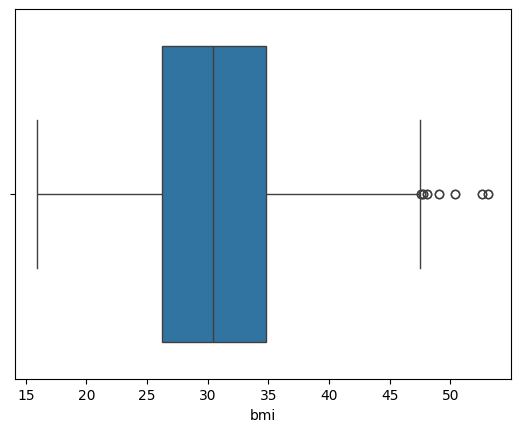

In [23]:
sb.boxplot(x=dados["bmi"])

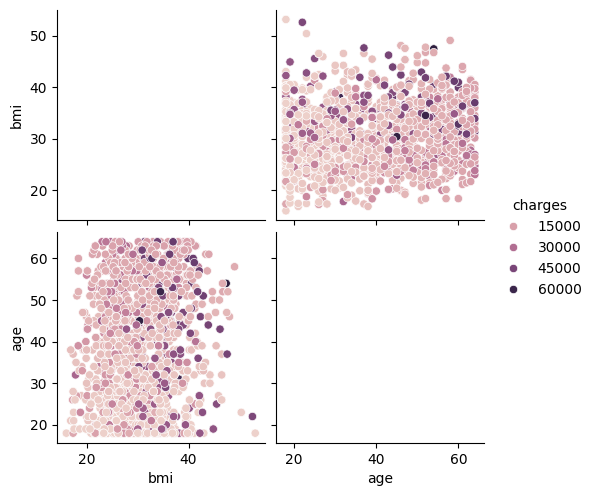

In [24]:
sb.pairplot(dados,vars=['bmi','age'],hue="charges")

**Obs:** Nesses gráficos, pode ser observar que quanto maior o bmi (indice de massa corportal) maior o gasto com o plano de saúde, o mesmo com  avanço da idade.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 83.3% of the points cannot be plac

[Text(13.000000000000002, 0.5, '')]

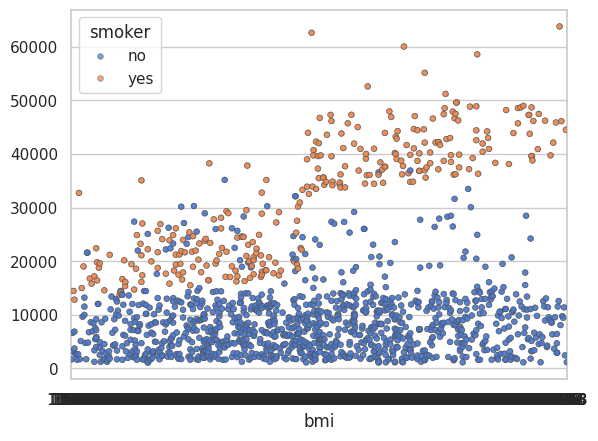

In [29]:
sb.set_theme(style="whitegrid", palette="muted")
ax = sb.swarmplot(data=dados, x="bmi", y="charges", hue="smoker",   size=4, linewidth=0.5,  alpha=0.7)
ax.set(ylabel="")

**Obs:** Aqui neste gráfico (smoker, bmi e charges), pode perceber que fumantes tem mais gastos com o plano de saude e quanto mais alto IMC o gasto vai aumentando


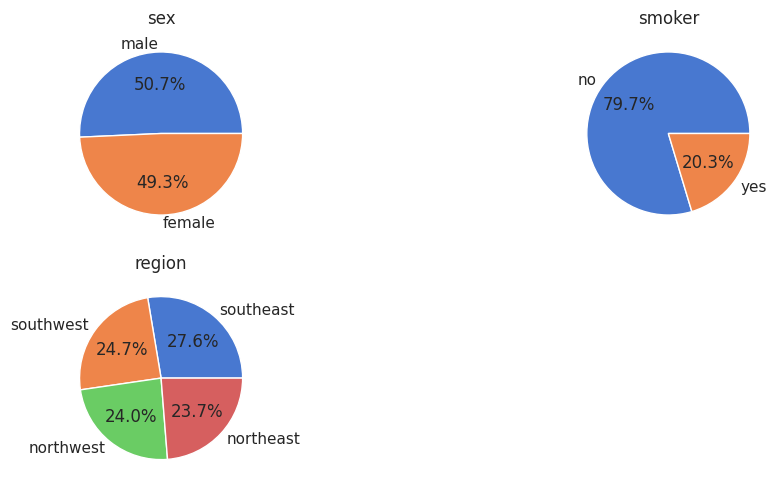

In [34]:
plt.figure(figsize=(12,9))
for i,col in enumerate(['sex','smoker','region']):
    plt.subplot(3,2,i+1)
    x=dados[col].value_counts().reset_index()
    plt.title(col)
    plt.pie(x=x['count'],labels=x[col],autopct="%0.1f%%",colors=sns.color_palette('muted'))

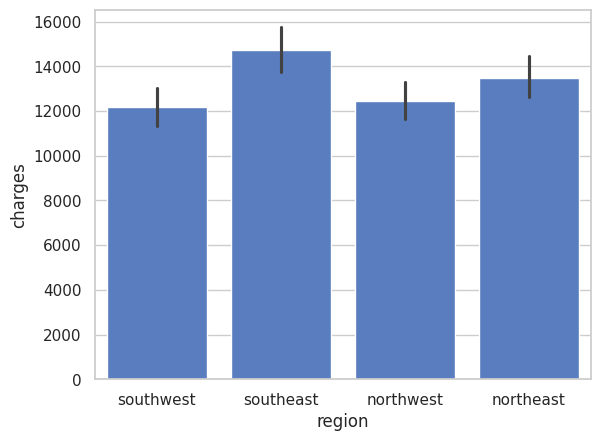

In [38]:
sns.barplot(data=dados,x=dados.region,y=dados.charges,estimator=np.mean)
plt.show()

# 1.1 - LabelEncoder

Vamos utilizar **label enconder** para tratar variáveis categóricas: **sex, smoker e region**

In [39]:
from sklearn.preprocessing import LabelEncoder

colunas=['sex','smoker','region']

label_encoder = LabelEncoder()
for col in colunas:
    dados[col] = label_encoder.fit_transform(dados[col])

dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# 1.2 - Categorizando BMI

**`O índice de massa corporal ( IMC )`** é um valor derivado da massa ( peso ) e altura de uma pessoa. O IMC é definido como a massa corporal dividida pelo quadrado da altura corporal e é expresso em unidades de kg/m 2

IMC, categorias básicas Categoria	IMC (kg/m 2 )
- Abaixo do peso (magreza severa):	< 16,0
- Abaixo do peso (magreza moderada):	16,0 – 16,9
- Abaixo do peso (magreza leve):	17,0 – 18,4
- Intervalo normal:	18,5 – 24,9
- Excesso de peso (pré-obeso):	25,0 – 29,9
- Obeso (Classe I):	30,0 – 34,9
- Obeso (Classe II):	35,0 – 39,9
- Obeso (Classe III):	≥ 40,0


In [53]:
dados["bmi-types"] = pd.cut(dados["bmi"],
                       bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf],
                       labels=[1, 2, 3, 4, 5, 6]).cat.codes

dados['bmi-types']

0       2
1       3
2       3
3       1
4       2
       ..
2767    5
2768    3
2769    2
2770    1
2771    3
Name: bmi-types, Length: 2772, dtype: int8

In [114]:
print(dados)

      age  sex     bmi  children  smoker  region      charges  bmi-types
0      19    0  27.900         0       1       3  16884.92400          2
1      18    1  33.770         1       0       2   1725.55230          3
2      28    1  33.000         3       0       2   4449.46200          3
3      33    1  22.705         0       0       1  21984.47061          1
4      32    1  28.880         0       0       1   3866.85520          2
...   ...  ...     ...       ...     ...     ...          ...        ...
2767   47    0  45.320         1       0       2   8569.86180          5
2768   21    0  34.600         0       0       3   2020.17700          3
2769   19    1  26.030         1       1       1  16450.89470          2
2770   23    1  18.715         0       0       1  21595.38229          1
2771   54    1  31.600         0       0       3   9850.43200          3

[2772 rows x 8 columns]


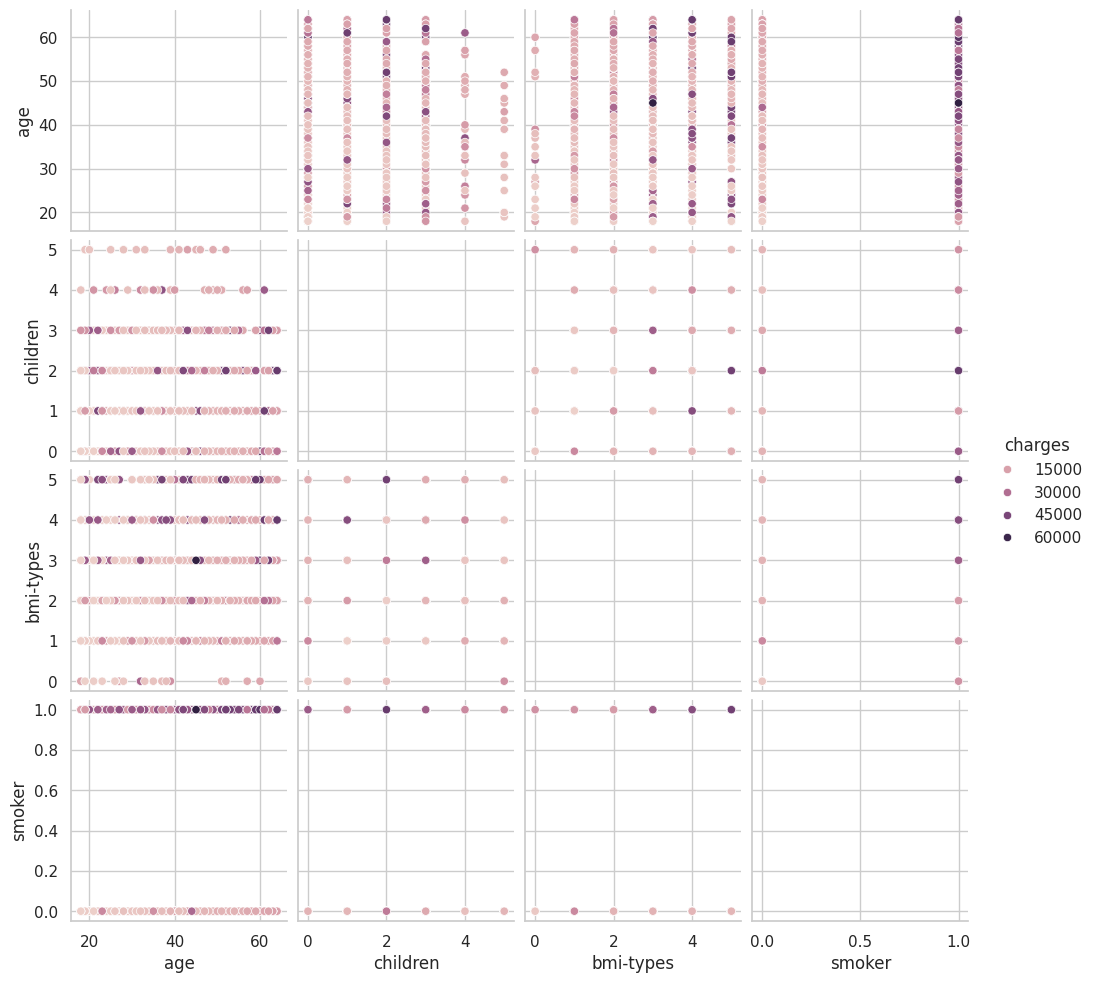

In [44]:
sb.pairplot(dados,vars=['age','children','bmi-types','smoker'],hue="charges")

# 1.3 - Correlações

<Axes: >

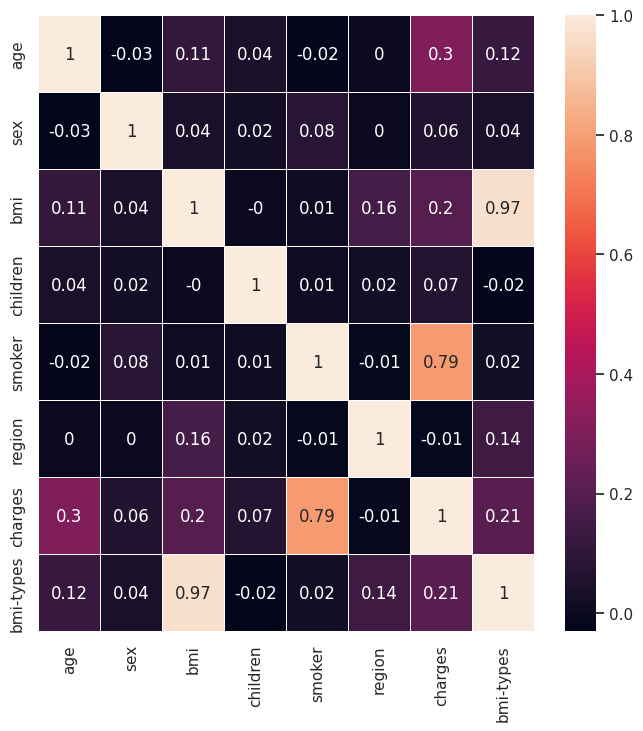

In [46]:
correlation_matrix = dados.corr().round(2)
fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

**obs:** pode ser percebido que a correlação dos gastos com a pessoa fumante é alta de 0,79 e com bmi de 0,20 e de idade 0,3

In [147]:

correlation_matrix = dados.corr()
max_corr = correlation_matrix.stack().sort_values(ascending=False).drop_duplicates()
max_corr = max_corr[max_corr < 1].head(10)

print("Maiores correlações:")
print(max_corr)

Maiores correlações:
bmi        bmi-types    0.965201
charges    smoker       0.788783
           age          0.298624
           bmi-types    0.210491
           bmi          0.199846
bmi        region       0.159178
bmi-types  region       0.144059
           age          0.119309
age        bmi          0.113048
smoker     sex          0.082326
dtype: float64


# Bases de treino e teste

- função para estratificação da base de treinamento e teste do modelo

In [171]:
from sklearn.model_selection import StratifiedShuffleSplit

def process_split_train_test(X, y, is_shuffle=True):

    if is_shuffle:
      print("Usando o ShuffleSplit em bmi-types")
      split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
      for train_index, test_index in split.split(X, X["bmi-types"]):
          shuffe_train = dados.loc[train_index]
          shuffe_test = dados.loc[test_index]

      print("% base de treino -------------------")
      print(shuffe_train["bmi-types"].value_counts() / len(shuffe_train))

      print("% base de teste ---------------------")
      print(shuffe_test["bmi-types"].value_counts() / len(shuffe_test))

      X_train = shuffe_train.copy()
      y_train = X_train['charges'].copy()

      X_train = X_train.drop(columns=['charges'], axis=1)

      X_test = shuffe_test.copy()
      y_test = X_test['charges'].copy()

      X_test = X_test.drop(columns=['charges'], axis=1)
    else:
      print("Não usando o ShuffleSplit")
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, y_train, X_test, y_test

- Definindo os dados de X e y

In [179]:
y = dados['charges']

# usando bmi (sem categorização) e NÃO usando o ShuffleSplit
#X = dados[['age', 'sex', 'smoker', 'region', 'children','bmi']]
#X_train, y_train, X_test, y_test = process_split_train_test(X, y, False)

# usando bmi-types (categorizado) e NÃO usando o ShuffleSplit
#X = dados[['age', 'sex', 'smoker', 'region', 'children','bmi-types']]
#X_train, y_train, X_test, y_test = process_split_train_test(X, y, False)


# usando bmi-types (categorizado) e SUN usando o ShuffleSplit
X = dados[['age', 'sex', 'smoker', 'region', 'children','bmi-types']]
X_train, y_train, X_test, y_test = process_split_train_test(X, y, True)

Usando o ShuffleSplit em bmi-types
% base de treino -------------------
bmi-types
3    0.294993
2    0.280559
4    0.170501
1    0.167343
5    0.071267
0    0.015336
Name: count, dtype: float64
% base de teste ---------------------
bmi-types
3    0.295495
2    0.281081
4    0.169369
1    0.167568
5    0.072072
0    0.014414
Name: count, dtype: float64


- função de avaliação do modelo

In [131]:
def avalia_modelo(model, X_train, y_train, X_test, y_test, y_predito):
  print("Avaliando o desempenho do modelo")
  mse = mean_squared_error(y_test, y_predito)

  erro_absoluto_medio = mean_absolute_error(y_test, y_predito)
  r2 = r2_score(y_test, y_predito)

  print("Mean Squared Error:", mse)
  print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
  print("R-squared:", r2)

  print()
  print("O score nos dá uma visão da precisão média da floresta aleatória nos dados")
  print("score train: ", model.score(X_train, y_train))
  print("score test: ", model.score(X_test, y_test))

- função de validação cruzada

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

def validacao_cruzada(model, k=10):
  print("")
  print("Validação cruzada k:", k)

  # Realize a validação cruzada e armazene os resultados em 'scores'
  scores = cross_val_score(model, X, y, cv=KFold(n_splits=k, shuffle=True, random_state=42))

  # Imprima a média e o desvio padrão das métricas
  print("K-Fold (R^2) Scores: {0}".format(scores))
  print("Desvio padrão do R²:", scores.std())
  print("Média do R²:", scores.mean())

# 2 - Regressao linear simples - - - - - - - - - - - - - - - - - - -


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [151]:
# Selecionando as features e o target

#X = dados[['age', 'bmi-types', 'sex', 'smoker', 'region', 'children']]
#X = dados[['age', 'bmi', 'sex', 'smoker', 'region', 'children']]
#y = dados['charges']

# Dividindo os dados em conjuntos de treino e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, y_train, X_test, y_test = process_split_train_test(dados)

# Criando um modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred = model.predict(X_test)

avalia_modelo(model, X_train, y_train, X_test, y_test, y_pred)

validacao_cruzada(model)


Avaliando o desempenho do modelo
Mean Squared Error: 33024642.154242273
Erro Absoluto Médio: 4093.8694431062736
R-squared: 0.7729323916558076

O score nos dá uma visão da precisão média da floresta aleatória nos dados
score train:  0.745176297215918
score test:  0.7729323916558076

Validação cruzada k: 10
K-Fold (R^2) Scores: [0.72422945 0.75718707 0.7571229  0.77613804 0.81186789 0.75126357
 0.76573181 0.68653974 0.67497235 0.78056701]
Desvio padrão do R²: 0.0401203764840266
Média do R²: 0.7485619806445217


**Resultado**

Com o modelo  **LinearRegression** , usamos a primeiro a informação 'bmi' sem fazer a categorização que obteve um resultado de **73,98%**. Após fizemos uma categorização na coluna 'bmi' que obtivemos um resultado de **74,08%.** E depois usamos a técnica de ShuffleSplit para treinar o modelo nas faixas de BMI, onde tem uma melhora nos resultados **77,29%**

| bmi categories | ShuffleSplit | R-squared |
|---|---|---|
| Não | Não | 0.7398 |
| Sim | Não | 0.7408 |
| Sim | Sim | 0.7729 |


# 2.1 - Visualizando previsões

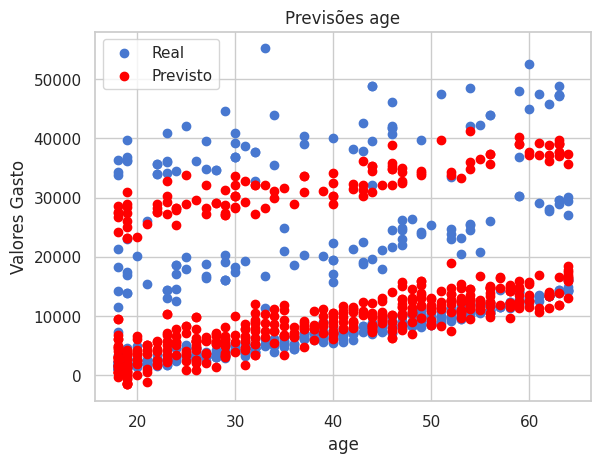

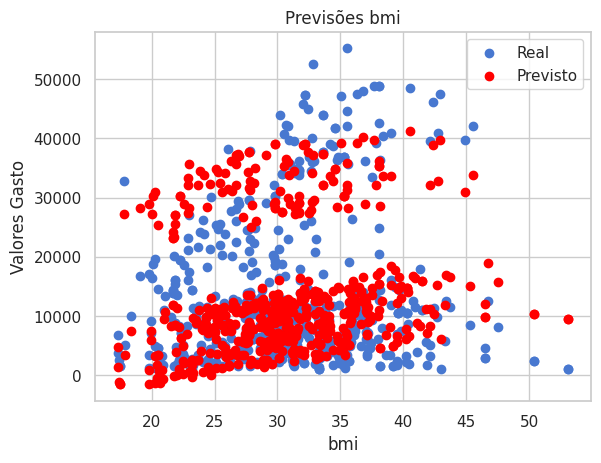

In [113]:

feature = 'age'

plt.scatter(X_test[feature], y_test, label='Real')
plt.scatter(X_test[feature], y_pred, label='Previsto', color='red')
plt.xlabel(feature)
plt.ylabel('Valores Gasto')
plt.title('Previsões age')
plt.legend()
plt.show()

feature = 'bmi'

plt.scatter(X_test[feature], y_test, label='Real')
plt.scatter(X_test[feature], y_pred, label='Previsto', color='red')
plt.xlabel(feature)
plt.ylabel('Valores Gasto')
plt.title('Previsões bmi')
plt.legend()
plt.show()

# 3 - Modelo baseado em árvore (DecisionTreeRegressor) - - - - - - - - - - - -



In [80]:
import seaborn as sns
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz

- Definindo X e y

In [116]:
y = dados['charges']

# usando bmi (sem categorização) e NÃO usando o ShuffleSplit
#X = dados[['age', 'sex', 'smoker', 'region', 'children','bmi']]
#X_train, y_train, X_test, y_test = process_split_train_test(X, y, False)

# usando bmi-types (categorizado) e NÃO usando o ShuffleSplit
#X = dados[['age', 'sex', 'smoker', 'region', 'children','bmi-types']]
#X_train, y_train, X_test, y_test = process_split_train_test(X, y, False)


# usando bmi-types (categorizado) e SUN usando o ShuffleSplit
X = dados[['age', 'sex', 'smoker', 'region', 'children','bmi-types']]
X_train, y_train, X_test, y_test = process_split_train_test(X, y, True)

Proporções na base de treino
bmi-types
3    0.294993
2    0.280559
4    0.170501
1    0.167343
5    0.071267
0    0.015336
Name: count, dtype: float64
Proporções na base de teste
bmi-types
3    0.295495
2    0.281081
4    0.169369
1    0.167568
5    0.072072
0    0.014414
Name: count, dtype: float64


In [142]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, y_train, X_test, y_test = process_split_train_test(dados)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_predito = dt.predict(X_test)

y_predito = dt.predict(X_test)

# Avaliando o desempenho do modelo
avalia_modelo(dt, X_train, y_train, X_test, y_test, y_predito)

validacao_cruzada(dt)

Avaliando o desempenho do modelo
Mean Squared Error: 7122499.687538659
Erro Absoluto Médio: 524.3221892612613
R-squared: 0.9510278124459887

O score nos dá uma visão da precisão média da floresta aleatória nos dados
score train:  0.9989664366880409
score test:  0.9510278124459887

Validação cruzada k: 10
K-Fold (R^2) Scores: [0.96418101 0.95330295 0.97960122 0.94816131 0.96012738 0.95620596
 0.94355272 0.95036027 0.92265263 0.97517955]
Desvio padrão do R²: 0.015401076652363906
Média do R²: 0.9553325003661148


**Resultado**

Com o modelo  **DecisionTreeRegressor** , usamos a primeiro a informação 'bmi' sem fazer a categorização obteve um resultado de **94,99%**. Após fizemos uma categorização na coluna '**bmi**' que obtivemos um resultado de **92,41%.** E depois usamos a técnica de **ShuffleSplit** para treinar o modelo nas faixas de BMI, onde tem uma melhora nos resultados **95,10%**

| bmi categories | ShuffleSplit | R-squared |
|---|---|---|
| Não | Não | 0.9499 |
| Sim | Não | 0.9241 |
| Sim | Sim | 0.9510 |

O **score** nos dá uma visão da precisão média da floresta aleatória nos dados

# 3.1 - Validação cruzada

In [128]:
from sklearn.model_selection import KFold, cross_val_score

# Defina o número de folds
k = 10

# Realize a validação cruzada e armazene os resultados em 'scores'
scores = cross_val_score(dt, X, y, cv=KFold(n_splits=k, shuffle=True, random_state=42))

# Imprima a média e o desvio padrão das métricas
print("K-Fold (R^2) Scores: {0}".format(scores))
print("Média do R²:", scores.mean())
print("Desvio padrão do R²:", scores.std())

K-Fold (R^2) Scores: [0.96418101 0.95330295 0.97960122 0.94816131 0.96012738 0.95620596
 0.94355272 0.95036027 0.92265263 0.97517955]
Média do R²: 0.9553325003661148
Desvio padrão do R²: 0.015401076652363906


# 3.2 - Visualizando as previsões

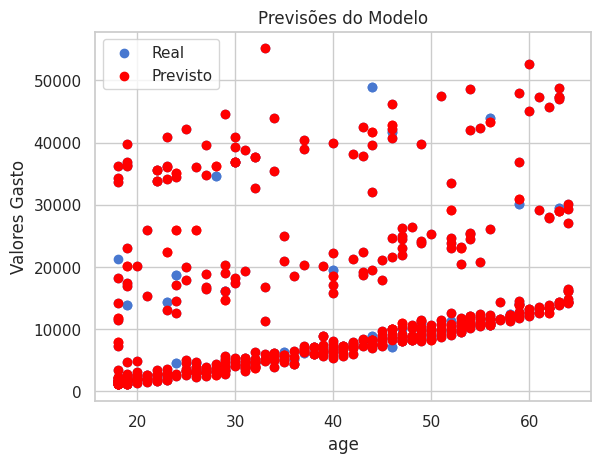

In [143]:
feature = 'age'

plt.scatter(X_test[feature], y_test, label='Real')
plt.scatter(X_test[feature], y_predito, label='Previsto', color='red')
plt.xlabel(feature)
plt.ylabel('Valores Gasto')
plt.title('Previsões do Modelo')
plt.legend()
plt.show()

# 4 - Modelo baseado em árvore (RandomForestRegressor) - - - - - - - - - - - - - -

- Definindo X e y

In [177]:
y = dados['charges']

# usando bmi (sem categorização) e NÃO usando o ShuffleSplit
#X = dados[['age', 'sex', 'smoker', 'region', 'children','bmi']]
#X_train, y_train, X_test, y_test = process_split_train_test(X, y, False)

# usando bmi-types (categorizado) e NÃO usando o ShuffleSplit
X = dados[['age', 'sex', 'smoker', 'region', 'children','bmi-types']]
X_train, y_train, X_test, y_test = process_split_train_test(X, y, False)


# usando bmi-types (categorizado) e SUN usando o ShuffleSplit
#X = dados[['age', 'sex', 'smoker', 'region', 'children','bmi-types']]
#X_train, y_train, X_test, y_test = process_split_train_test(X, y, True)

Não usando o ShuffleSplit


In [180]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_predito_random_forest = rf.predict(X_test)

# Avaliando o desempenho do modelo
avalia_modelo(rf, X_train, y_train, X_test, y_test, y_predito_random_forest)

validacao_cruzada(rf)

Avaliando o desempenho do modelo
Mean Squared Error: 4431461.244042481
Erro Absoluto Médio: 1112.6174135197293
R-squared: 0.9695305916880178

O score nos dá uma visão da precisão média da floresta aleatória nos dados
score train:  0.9923028555738399
score test:  0.9695305916880178

Validação cruzada k: 10
K-Fold (R^2) Scores: [0.95491294 0.94282809 0.95837274 0.93599482 0.96238347 0.94056774
 0.96069815 0.9445769  0.93698488 0.9698255 ]
Desvio padrão do R²: 0.011337274388285738
Média do R²: 0.9507145237969994


**Resultado**

Com o modelo  **RandomForestRegressor** , usamos a primeiro a informação 'bmi' sem fazer a categorização obteve um resultado de **94,99%**. Após fizemos uma categorização na coluna '**bmi**' que obtivemos um resultado de **92,41%.** E depois usamos a técnica de **ShuffleSplit** para treinar o modelo nas faixas de BMI, onde tem uma melhora nos resultados **95,10%**

| bmi categories | ShuffleSplit | R-squared |
|---|---|---|
| Não | Não | 0.9512 |
| Sim | Não | 0.9366 |
| Sim | Sim | 0.9695 |


# 4.1 - Validação cruzada

In [134]:
from sklearn.model_selection import KFold, cross_val_score

# Defina o número de folds
k = 10

# Realize a validação cruzada e armazene os resultados em 'scores'
scores = cross_val_score(rf, X, y, cv=KFold(n_splits=k, shuffle=True, random_state=42))

# Imprima a média e o desvio padrão das métricas
print("K-Fold (R^2) Scores: {0}".format(scores))
print("Média do R²:", scores.mean())
print("Desvio padrão do R²:", scores.std())

K-Fold (R^2) Scores: [0.95491294 0.94282809 0.95837274 0.93599482 0.96238347 0.94056774
 0.96069815 0.9445769  0.93698488 0.9698255 ]
Média do R²: 0.9507145237969994
Desvio padrão do R²: 0.011337274388285738


# 4.2 - Vizualizando as previsões

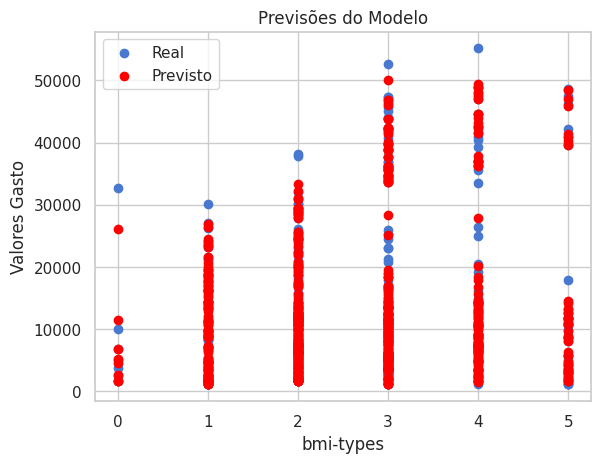

In [174]:
feature = 'bmi-types'

plt.scatter(X_test[feature], y_test, label='Real')
plt.scatter(X_test[feature], y_predito_random_forest, label='Previsto', color='red')
plt.xlabel(feature)
plt.ylabel('Valores Gasto')
plt.title('Previsões do Modelo')
plt.legend()
plt.show()

# 4.3 - Usando StandardScaler

In [188]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler() #chamando o metodo de padronização dos dados (média e std)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_predito_random_forest_scaled = rf.predict(X_test_scaled)

avalia_modelo(rf, X_train_scaled, y_train, X_test_scaled, y_test, y_predito_random_forest_scaled)

Avaliando o desempenho do modelo
Mean Squared Error: 4440052.535117178
Erro Absoluto Médio: 1114.4365138156456
R-squared: 0.9694715205281303

O score nos dá uma visão da precisão média da floresta aleatória nos dados
score train:  0.9922940824818299
score test:  0.9694715205281303


Não há melhoras no modelo, usando StandardScaler